<a href="https://colab.research.google.com/github/sap-tarshi-ghosh/Image-Processing-Tutorial/blob/main/code/Histogram_and_Histogram_Equilization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Histogram and Histogram Equilization


---
Date: 30.01.2026



In [ ]:
from PIL import Image

image = Image.open("image-processing-test-1.png").convert("L")

width, height = image.size
#print(width, height)
pixels = list(image.getdata())

#converting into 2d list
img = []
for y in range(height):
  row = []
  for x in range(width):
    row.append(pixels[y* width + x])
  img.append(row)
#print(img)

# Implementing image **histogram**

In [ ]:
#list of size(256) all initilised with 0
hist = [0] *256 #this is the histogram o fthe origiinal image

#counting frequencies
for y in range(height):
  for x in range(width):
    intensity = img[y][x] #checking intensity value of that pixel
    hist[intensity] += 1  #increasing that particular position in the list(hist)



In [ ]:
#checking
for i in range(0, 256, 20):
  print(f"Intensity {i}: {hist[i]}")

Intensity 0: 0
Intensity 20: 29
Intensity 40: 15
Intensity 60: 70
Intensity 80: 190
Intensity 100: 340
Intensity 120: 508
Intensity 140: 648
Intensity 160: 580
Intensity 180: 314
Intensity 200: 148
Intensity 220: 74
Intensity 240: 31


#Cumulative Distribution Function

In [ ]:
cdf = [0]*256

cdf[0] =hist[0]
for i in range(256):
  cdf[i] = cdf[i-1] + hist[i]

#checking
print('CDF[0] : ', cdf[0])
print('CDF[255]: ', cdf[255])
print('hist[0]+...+hist[255]:', sum(hist))
print('Total pixels: ', width*height)

CDF[0] :  0
CDF[255]:  63900
hist[0]+...+hist[255]: 63900
Total pixels:  63900


In [ ]:
#searcjhing for the first non zero value in the list(cdf)
cdf_min = 0
for i in range(256):
  if cdf[i] != 0:
    cdf_min = cdf[i]
    break

calculating and mapping new intensity value from the old intensity value

In [ ]:
N = height * width
mapping = [0] *256

for i in range(256):
  value = (cdf[i] - cdf_min)/(N - cdf_min) * 255
  if value < 0:
    value = 0
  mapping[i] = int(value)

# Applyting the mapping to every pixel in the image

Creating a new image matrix

In [ ]:
equalize_img = []

for y in range(height):
  row = []
  for x in range(width):
    old_val = img[y][x]
    new_val = mapping[old_val]
    row.append(new_val)
  equalize_img.append(row)

In [ ]:
hist_eq = [0]*256 #this is the histogram of equilised image

for y in range(height):
  for x in range(width):
    intensity = equalize_img[y][x]
    hist_eq[intensity] += 1

# Visualisation

Original image

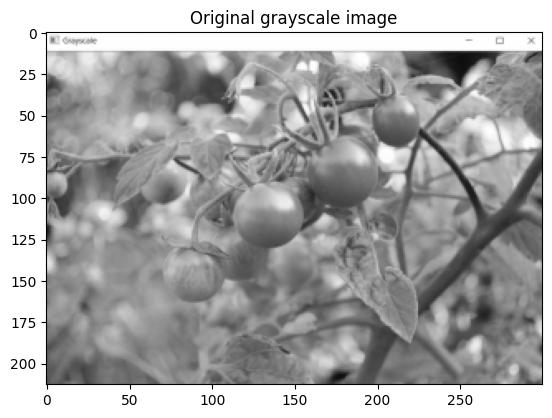

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original grayscale image')
plt.show()

Original histogram

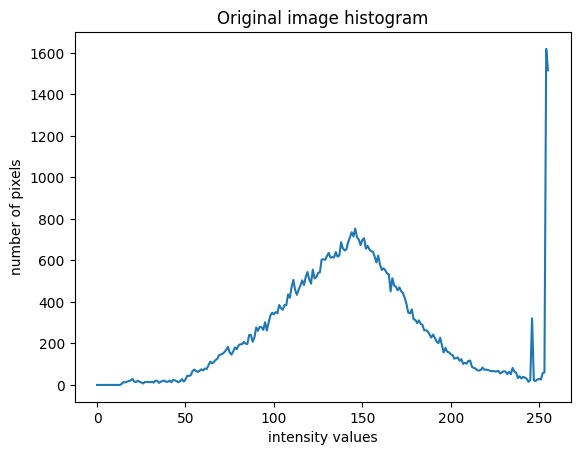

In [ ]:
x = list(range(256))

plt.plot(x, hist)
plt.title('Original image histogram')
plt.xlabel('intensity values')
plt.ylabel('number of pixels')
plt.show()

Visualising the CDF

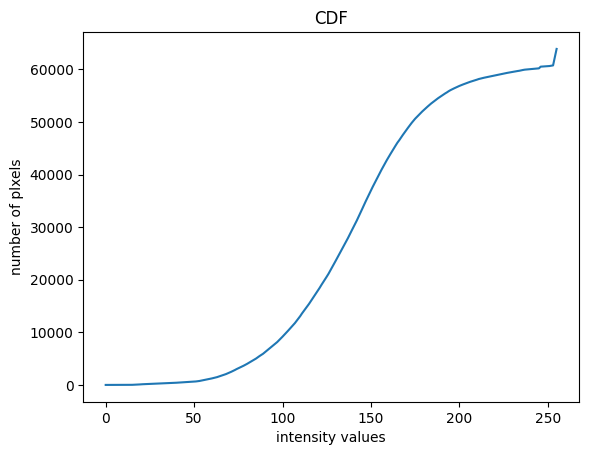

In [ ]:
plt.plot(x, cdf)
plt.title('CDF')
plt.xlabel('intensity values')
plt.ylabel('number of plxels')
plt.show()


Visualise the processed image

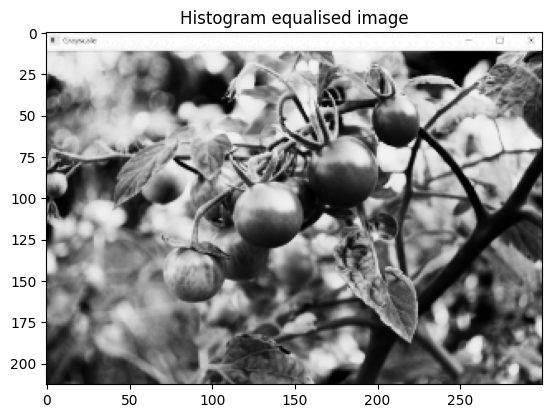

In [ ]:
plt.imshow(equalize_img, cmap='gray', vmin=0, vmax=255)
plt.title('Histogram equalised image')
plt.show()

Histogram of the equalised image

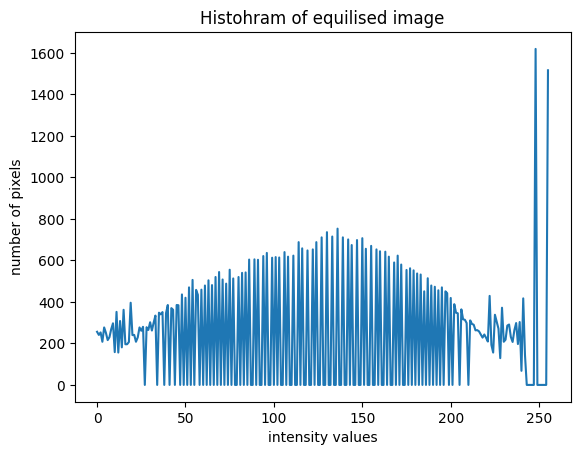

In [ ]:
x = list(range(256))
plt.plot(x, hist_eq)
plt.title('Histohram of equilised image')
plt.xlabel('intensity values')
plt.ylabel('number of pixels')
plt.show()

In [ ]:
min_orig = 255
max_orig = 0

for y in range(height):
    for x in range(width):
        val = img[y][x]
        if val < min_orig:
            min_orig = val
        if val > max_orig:
            max_orig = val

min_eq = 255
max_eq = 0

for y in range(height):
    for x in range(width):
        val = equalize_img[y][x]
        if val < min_eq:
            min_eq = val
        if val > max_eq:
            max_eq = val

print("Original min/max:", min_orig, max_orig)
print("Equalized min/max:", min_eq, max_eq)


Original min/max: 14 255
Equalized min/max: 0 255


Side by side comaprision of original and equilised image

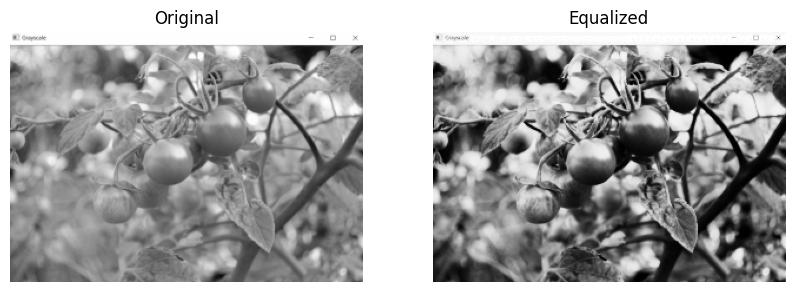

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalize_img, cmap='gray', vmin=0, vmax=255)
plt.title("Equalized")
plt.axis('off')

plt.show()
